In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [ ]:
print("🔁 Loading dataset...")

# Load the dataset
df = pd.read_csv('../../data/data_set.csv', encoding='latin-1')

# Drop 'Email No.' column if it exists
if 'Email No.' in df.columns:
    df = df.drop(columns='Email No.')

# Make sure all values are numeric
df = df.apply(pd.to_numeric, errors='coerce').fillna(0)

# Separate features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print("Dataset ready. Number of features:", X.shape[1])


🔁 Loading dataset...
📊 Dataset ready. Number of features: 3000


In [29]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
print("🚀 Training model...")
model = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
model.fit(X_train, y_train)


🚀 Training model...


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'



✅ Accuracy: 0.97

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       739
           1       0.93      0.97      0.95       296

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.96      1035
weighted avg       0.97      0.97      0.97      1035



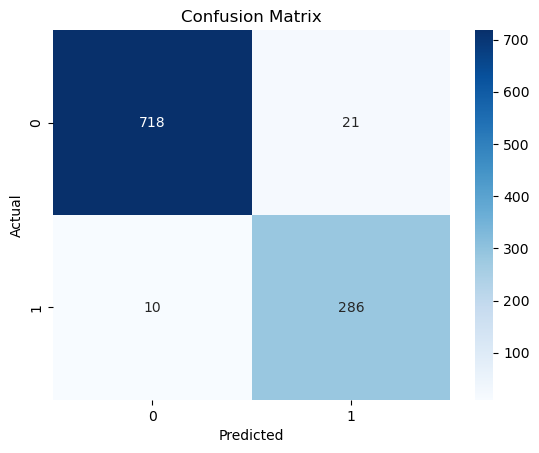

In [ ]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("\n Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [33]:
# Save model and feature names
joblib.dump(model, 'spam_model.pkl')
joblib.dump(list(X.columns), 'feature_names.pkl')
print("💾 Model and feature names saved.")


💾 Model and feature names saved.


In [35]:
import re

# Load model and feature names
model = joblib.load('spam_model.pkl')
feature_names = joblib.load('feature_names.pkl')

# User input
raw_email = input("📥 Enter your raw email content: ")

# Preprocess: lowercase and extract words
words_in_email = set(re.findall(r'\b\w+\b', raw_email.lower()))

# Create binary feature vector
email_features = {feature: (1 if feature in words_in_email else 0) for feature in feature_names}

# Convert to DataFrame
email_df = pd.DataFrame([email_features], columns=feature_names)

# Predict
prediction = model.predict(email_df)

# Output result
print("\n📧 Prediction:")
print("🔴 SPAM" if prediction[0] == 1 else "🟢 NOT SPAM")



📧 Prediction:
🟢 NOT SPAM
